<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [10]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
import os

In [18]:
# Utilice este espacio para escribir el código.

data = fetch_olivetti_faces()
print("Keys:", data.keys()) # display keys

# Array con imágenes
images = data.images
# Array con etiquetas
target = data.target
# Array con nombres
Descr = data.DESCR

Keys: dict_keys(['data', 'images', 'target', 'DESCR'])


(Utilice este espacio para describir su procedimiento).

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

Dimensiones del array de imágenes
3
Longitud en las dimensiones del array de imágenes
(400, 64, 64)
Min, Max, promedio
0.0
1.0
0.5470426
Dimensiones de una sola imagen
Dimensión: 64 x 64


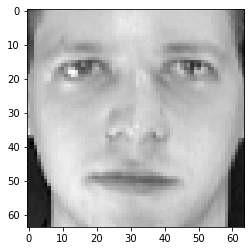

In [19]:
# Utilice este espacio para escribir el código.
# Dimensiones del array de imagenes:
print("Dimensiones del array de imágenes")
print(images.ndim)
print("Longitud en las dimensiones del array de imágenes")
print(images.shape)

print("Min, Max, promedio")
print(np.min(images))
print(np.max(images))
print(np.average(images))

# Intensidad de luz
image = images[0,:]
# Dimensiones de una sola imagen
print("Dimensiones de una sola imagen")
n,k= image.shape
print("Dimensión:", n, "x", k)

# Se grafica la imagen 
plt.imshow(image, cmap='gray')
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

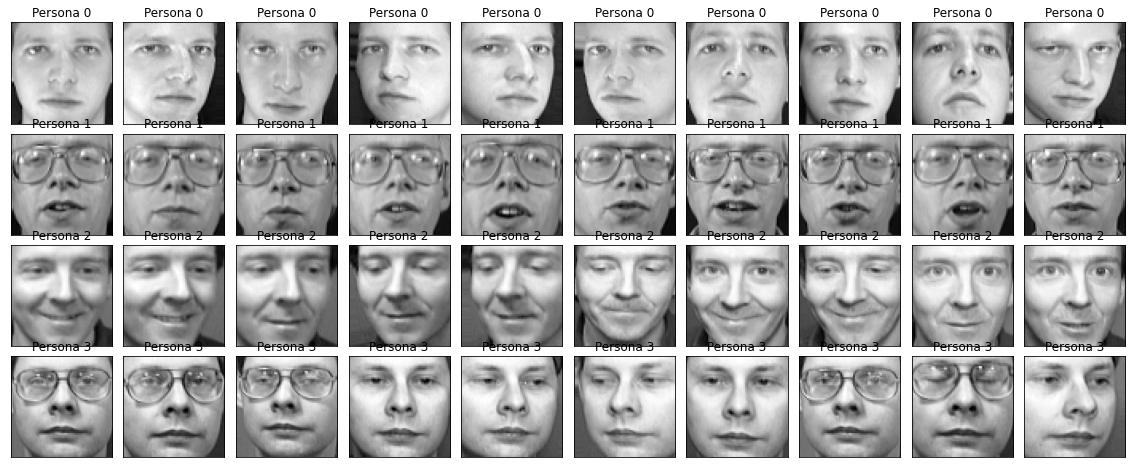

In [21]:
# Utilice este espacio para escribir el código.
# Obtener las imágenes y etiquetas
X_faces = data.data
y_faces = data.target

# Crear una figura con una cuadrícula de imágenes
fig, axes = plt.subplots(4, 10, figsize=(20, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_faces[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'Persona {y_faces[i]}')

plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [23]:
# Utilice este espacio para escribir el código.
# Estandarizar los valores de píxeles en las imágenes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_faces_scaled = scaler.fit_transform(X_faces)

# Crear un DataFrame con los valores estandarizados y las etiquetas
columns = [f'pixel_{i}' for i in range(X_faces_scaled.shape[1])]
df = pd.DataFrame(X_faces_scaled, columns=columns)
df['etiqueta'] = y_faces

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,etiqueta
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663787,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.157252,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.293754,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.481785,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.134501,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [24]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

In [25]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

In [26]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [27]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [28]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)